## **Wykrywanie naczyń dna siatkówki oka**

### *Biblioteki*

In [201]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

### *Funkcje*

In [202]:
def show_image(image, title=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title) if title else None
    plt.axis('off')
    plt.show()

### 0. Wczytanie obrazu

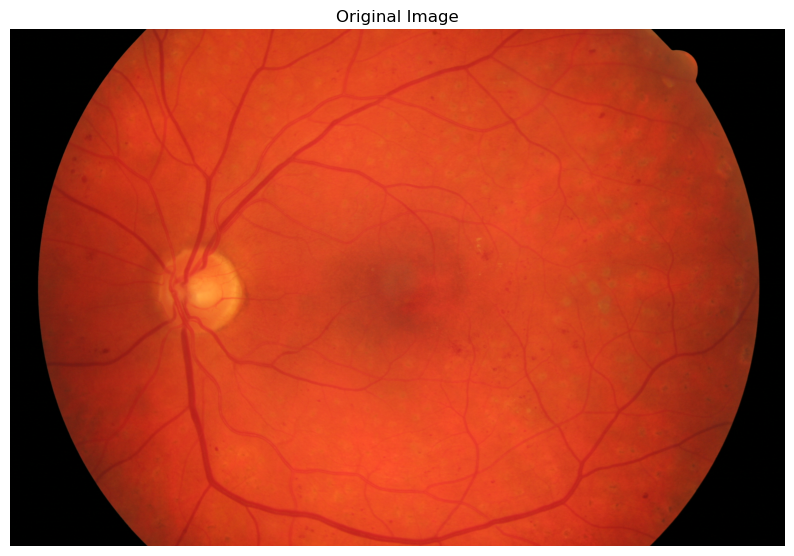

Szerokość obrazu: 3504
Wysokość obrazu: 2336


In [203]:
image_path = 'HRF-database/images/01_dr.JPG'
originalImage = cv2.imread(image_path)

show_image(originalImage, title='Original Image')
print("Szerokość obrazu:", originalImage.shape[1])
print("Wysokość obrazu:", originalImage.shape[0])

### 1. Przetowrzenie obrazu

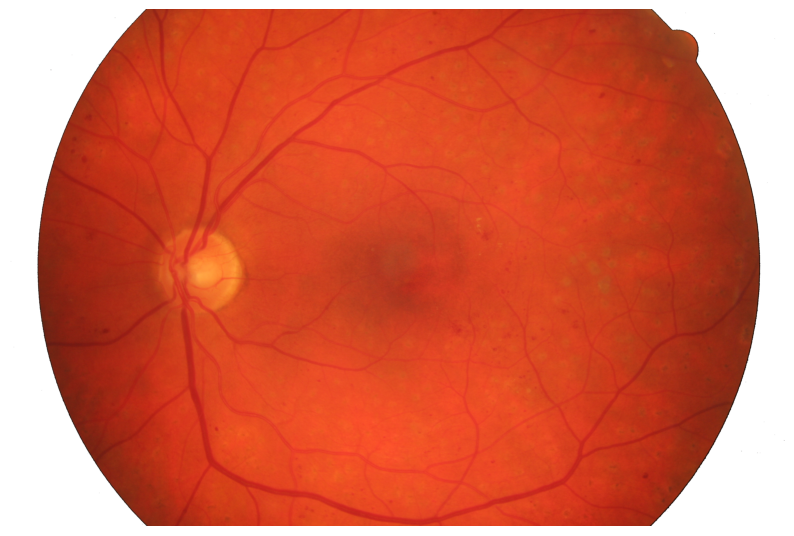

In [204]:
image = originalImage.copy()
threshold = 6 # Próg dla każdego kanału kolorów

image[np.where((originalImage < threshold).all(axis=2))] = [255, 255, 255] # transformacja tła

show_image(image)

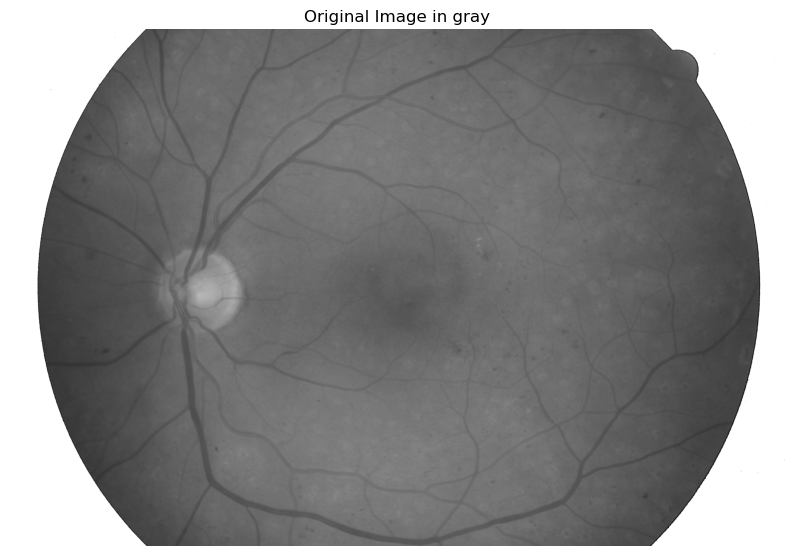

In [205]:
# Konwersja do skali szarości
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray, title='Original Image in gray')

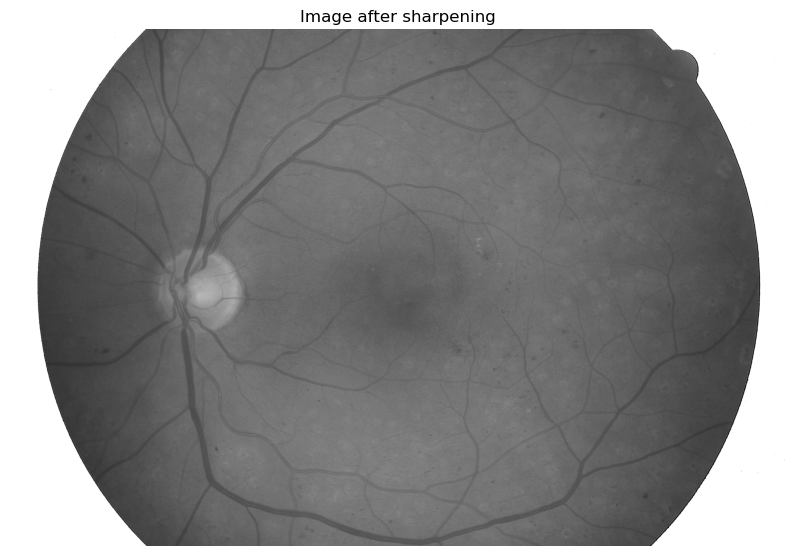

In [213]:
# Wyostrzenie obrazu
sharp_image = cv2.filter2D(gray, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
show_image(sharp_image, title='Image after sharpening')

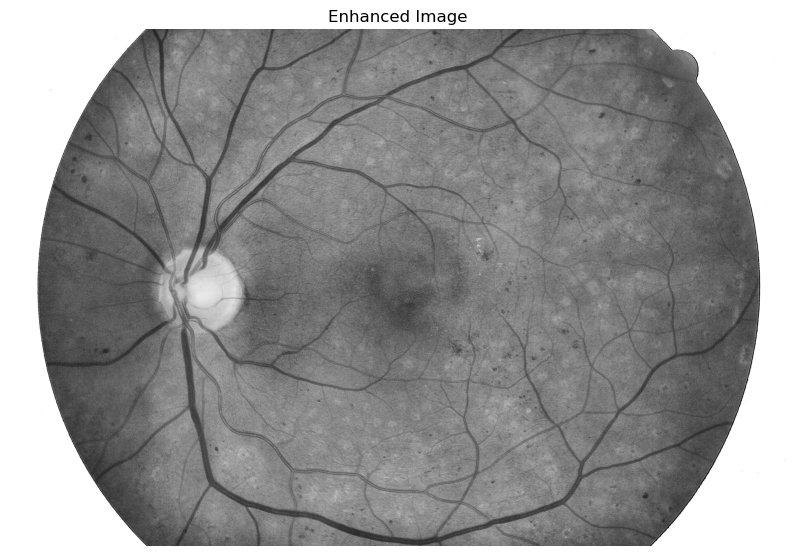

In [214]:
# Zwiększenie kontrastu
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(sharp_image)
show_image(enhanced_image, title='Enhanced Image')

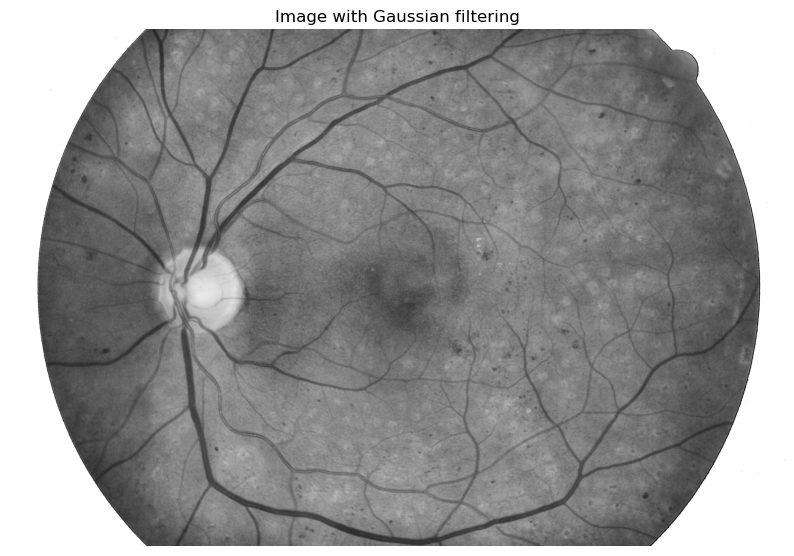

In [216]:
# Filtr bilateralny
bilateralFiltered = cv2.bilateralFilter(enhanced_image,9,50,50)
show_image(bilateralFiltered, title='Image with Gaussian filtering')

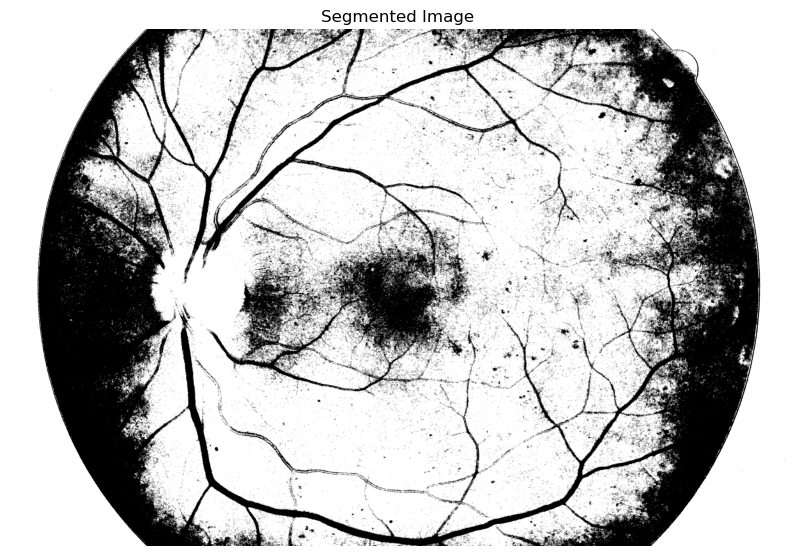

In [217]:
threshold_value = 105 # Ustalenie progu

_, segmented_image = cv2.threshold(bilateralFiltered, threshold_value, 255, cv2.THRESH_BINARY) # segmentacja poprzez progowanie

show_image(segmented_image, title='Segmented Image')

In [218]:
# Odwrócenie kolorów
inverted_segmented_image = 255 - segmented_image
#show_image(inverted_segmented_image, title='Inverted Segmented Image')

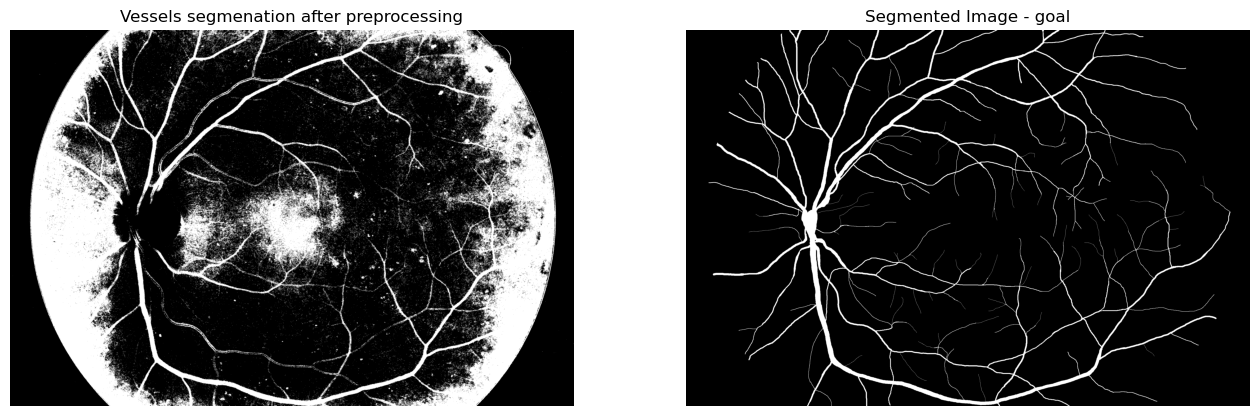

In [221]:
tif_image_path = "HRF-database/manual1/01_dr.tif"
tif_image = Image.open(tif_image_path)

# Konwersja obrazu PIL do numpy array
tif_array = np.array(tif_image)

plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
plt.imshow(inverted_segmented_image, cmap='gray')
plt.title('Vessels segmenation after preprocessing')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tif_array, cmap='gray')
plt.title('Segmented Image - goal')
plt.axis('off')

plt.show()


### 2. Ekstrakcja cech

### 3. Prosty klasyfikator do porównań z CNN (SVM / kNN / RF)

### 4. Model głębokiej konwolucyjnej sieci neuronowej

### 5. Wyniki dla przykładowych instancji